In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
df = pd.read_csv('indian_liver_patient.csv', encoding= 'unicode_escape')

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df['Age'].unique()

array([65, 62, 58, 72, 46, 26, 29, 17, 55, 57, 64, 74, 61, 25, 38, 33, 40,
       51, 63, 34, 20, 84, 52, 30, 48, 47, 45, 42, 50, 85, 35, 21, 32, 31,
       54, 37, 66, 60, 19, 75, 68, 70, 49, 14, 13, 18, 39, 27, 36, 24, 28,
       53, 15, 56, 44, 41,  7, 22,  8,  6,  4, 43, 23, 12, 69, 16, 78, 11,
       73, 67, 10, 90], dtype=int64)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['Total_Bilirubin'].unique()

array([ 0.7, 10.9,  7.3,  1. ,  3.9,  1.8,  0.9,  0.6,  2.7,  1.1,  1.6,
        2.2,  2.9,  6.8,  1.9,  4.1,  6.2,  4. ,  2.6,  1.3, 14.2,  1.4,
        2.4, 18.4,  3.1,  8.9,  0.8,  2.8,  2. ,  5.7,  8.6,  5.8,  5.2,
        3.8,  6.6,  0.5,  5.3,  3.2,  1.2, 12.7, 15.9, 18. , 23. , 22.7,
        1.7,  3. , 11.3,  4.7,  4.2,  3.5,  5.9,  8.7, 11. , 11.5,  4.5,
       75. , 22.8, 14.1, 14.8, 10.6,  8. ,  1.5,  2.1,  6.3,  2.3, 27.2,
        2.5,  3.6, 30.5, 16.4, 14.5, 18.5, 23.2,  3.7,  3.3,  7.1,  6.7,
       22.6,  7.5,  5. ,  4.9,  8.2,  0.4,  7.4, 23.3,  7.9,  3.4, 19.8,
       32.6, 17.7, 20. , 26.3,  4.4,  9.4, 30.8, 19.6, 15.8,  5.5, 20.2,
       27.7, 11.1, 10.2, 42.8, 15.2, 16.6, 17.3, 22.5, 16.7,  7.7, 15.6,
       12.1, 25. , 15. ])

In [10]:
df['Direct_Bilirubin'].unique()

array([ 0.1,  5.5,  4.1,  0.4,  2. ,  0.7,  0.2,  0.3,  1.3,  0.8,  0.5,
        1. ,  3. ,  1.9,  1.2,  7.8,  0.6,  1.1,  3.2,  1.8,  8.8,  1.6,
        4.5,  2.8,  4. ,  2.7,  2.4,  1.5,  2.3,  3.6,  6.2,  7. ,  8.2,
       11.3, 10.2,  2.5,  1.4,  1.7,  5.6,  2.2,  2.1,  4.9,  5. ,  0.9,
       12.6,  7.6,  9. ,  4.6, 11.8, 14.2,  8.9,  6.4,  9.5,  3.3, 11.4,
        4.3,  3.7,  2.6,  3.9,  5.1, 12.8, 10.4, 17.1, 14.1,  8.5, 10. ,
       12.1,  2.9,  5.2, 18.3,  7.2, 11.7, 10.8,  6.1,  4.2, 19.7,  7.7,
        8.4,  6. , 13.7])

In [11]:
df['Alkaline_Phosphotase'].unique()

array([ 187,  699,  490,  182,  195,  208,  154,  202,  290,  210,  260,
        310,  214,  145,  183,  342,  165,  293,  610,  482,  542,  231,
        194,  289,  240,  128,  188,  190,  156,  410,  374,  263,  275,
        168,  160,  630,  415,  150,  230,  176,  206,  170,  161,  253,
        198,  272,  175,  367,  158,  259,  470,  215,  239,  186,  205,
        171,  162,  518, 1620,  146,  670,  915,   75,  148,  258,  237,
        269,  320,  298,  538,  238,  308,  204,  282,  265,  312,  243,
        224,  225,  486,  257,  179,  661, 1580, 1630,  280,  300,  178,
        177,  201,  802,  248, 1896,  512,  199, 1110,  380,  159,  332,
        189,  392,  286,  180,  218,  462,  196,  750, 1050,  599,  292,
        962,  950,  200, 1020,  562,  386,  250,  191,  614,  314,  209,
       1124,  664,  142,  169, 1420,  135,  163,  285,  350,  220,  219,
        401,  100,  116,  125,  147,  192,  400,  120,  173,  157, 2110,
        360,  316,  498,  480,  680,  152,  859,  9

In [12]:
df['Alamine_Aminotransferase'].unique()

array([  16,   64,   60,   14,   27,   19,   22,   53,   51,   31,   61,
         91,  168,   15,  232,   17,  116,   52,  875, 1680,   20,   13,
         45,   35,   59,  102,   18,   38,  123,   33,   42,   25,  407,
         48,   36, 1630,   39,   21,   80,   86,   26,   24,   37,   40,
         62,   55,  166,  189,   95,   12,  194,   58,   28,  119,  412,
        404,  220,  126,  190,   97,  308,   32,   29,   11,   63,  181,
         88,   74, 2000, 1350, 1250,  482,  322,  133,   46,   57,   50,
         34,   72,   84,   30,   70,  140,   99,   43,  378,  112,   71,
         23,   79,  114,  118,  107,  790,  950,   82,   41,   56,   85,
        149,  230,   69,   90,   89,  148,   65,  205,   96,  152,  390,
         10,  120,   78,  178,  179,   47,  160,   54,  198,   44,  349,
        110,  115,   94,  142,  137,  155,  157,  141,  284,  440,   93,
         76,   49,  425,  159,  622,  779,  132,  154,  196,   68,  509,
         67,  139,  382,   75,  321,  233,  173,  2

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [14]:
df['Aspartate_Aminotransferase'].unique()

array([  18,  100,   68,   20,   59,   14,   12,   11,   19,   58,   56,
         30,   41,   53,  441,   23,  245,   28,   34,   66,   55,   45,
        731,  850,   21,  111,   44,   57,   80,   36,   77,   73,   50,
        110,   47,  576,   15,  178,   27,  960,  406,  150,   61,   54,
         24,   16,   43,   97,   86,   88,   95,   26,   17,  397,   29,
         22,  127,   79,  142,  152,   31,  350,  794,  400,  202,  630,
        950,  161,  405,   92,   39,   10,  116,   98,  285,   64,  149,
       2946, 1600, 1050,  275,  113,   84,   25,   40,   83,   65, 4929,
         90,  140,  139,   87,   38,   42,  233,  138,   82,   35,   32,
        187,   62,   74,   67,   37,  602,   63,   99,  103,  145,  247,
        114,  104,   51,   60, 1500,   33,  180,  148,   46,   13,   85,
        231,  156,   89,  298,   48,  130,   75,  500,  105,  250,  232,
        143,  176,   70,   52,   91,  236,  108,  190,   71,  126,  141,
        102,   81,  511,   72,  135,  497,  844,  3

In [15]:
df['Total_Protiens'].unique()

array([6.8, 7.5, 7. , 7.3, 7.6, 6.7, 7.4, 5.9, 8.1, 5.8, 5.5, 6.4, 4.3,
       6. , 5. , 7.2, 3.9, 5.2, 4.9, 5.6, 6.9, 6.2, 5.1, 6.1, 6.5, 5.7,
       6.6, 6.3, 8. , 4.4, 5.3, 4.6, 4.7, 5.4, 7.1, 4. , 3.7, 2.7, 3. ,
       3.8, 7.8, 4.5, 4.1, 4.8, 7.9, 8.5, 7.7, 8.2, 2.8, 9.5, 9.6, 8.3,
       8.6, 8.4, 8.9, 8.7, 3.6, 9.2])

In [16]:
df['Albumin'].unique()

array([3.3, 3.2, 3.4, 2.4, 4.4, 3.5, 3.6, 4.1, 2.7, 3. , 2.3, 3.1, 2.6,
       1.6, 3.9, 4. , 1.9, 1.5, 2.9, 2. , 2.2, 2.8, 1.8, 2.5, 2.1, 3.7,
       3.8, 4.3, 1.7, 4.2, 4.5, 0.9, 1.4, 4.7, 5.5, 4.9, 4.6, 4.8, 5. ,
       1. ])

In [17]:
df['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

In [18]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [19]:
#pip install seaborn

In [20]:
import seaborn as sns

<AxesSubplot:>

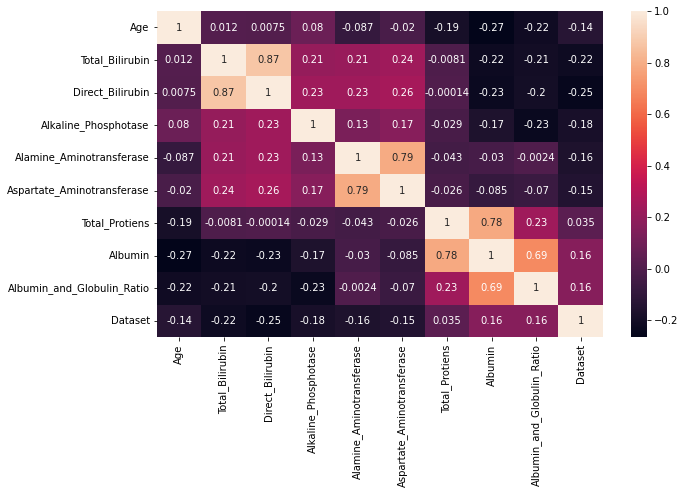

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


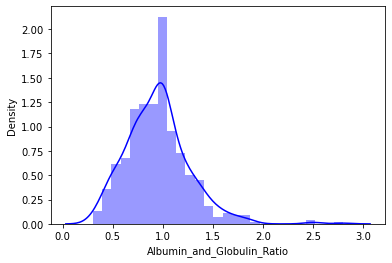

In [23]:
sns.distplot(df.Albumin_and_Globulin_Ratio,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


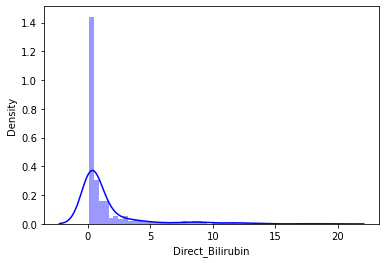

In [24]:
sns.distplot(df.Direct_Bilirubin,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


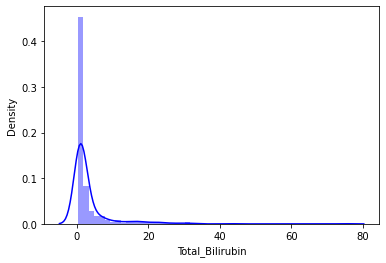

In [25]:
sns.distplot(df.Total_Bilirubin,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


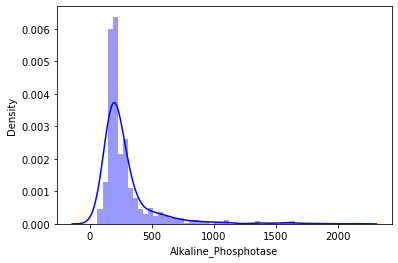

In [26]:
sns.distplot(df.Alkaline_Phosphotase,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


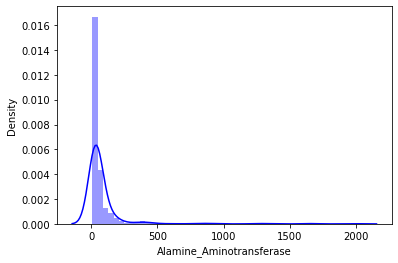

In [27]:
sns.distplot(df.Alamine_Aminotransferase,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


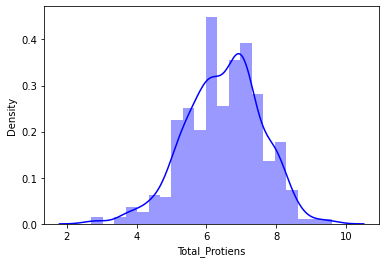

In [28]:
sns.distplot(df.Total_Protiens,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


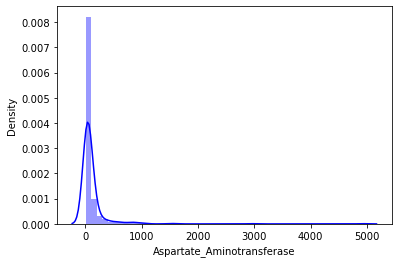

In [29]:
sns.distplot(df.Aspartate_Aminotransferase,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


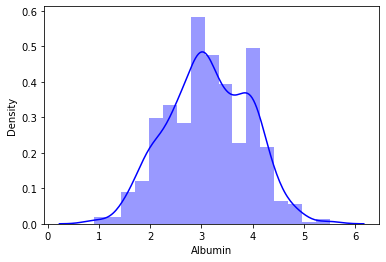

In [30]:
sns.distplot(df.Albumin,color='blue')
plt.show()

C:\Users\SanthoshkumarSambamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


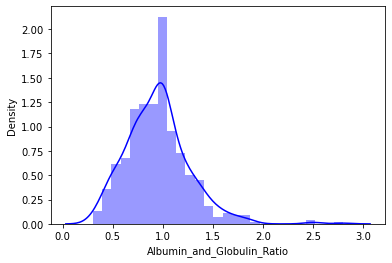

In [31]:
sns.distplot(df.Albumin_and_Globulin_Ratio,color='blue')
plt.show()

In [32]:
import numpy as np

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [34]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
df.loc[df['Gender']=='Female', 'Gender'] = 1
df.loc[df['Gender']=='Male', 'Gender'] = 2

In [36]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,2,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,2,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,2,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,2,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [37]:
from sklearn.utils import resample

In [38]:
n = df.Dataset.value_counts()[1]

df_majority = df[df.Dataset==1]
df_minority = df[df.Dataset==2]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df = pd.concat([df_majority,df_minority_upsampled])
df.Dataset.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

In [39]:
X = df.drop(['Dataset'], axis = 1)

y = df['Dataset']

In [40]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
114,50,2,5.8,3.0,661,181,285,5.7,2.3,0.67
344,37,2,0.8,0.2,195,60,40,8.2,5.0,1.50
431,47,1,0.8,0.2,236,10,13,6.7,2.9,0.76
411,23,1,2.3,0.8,509,28,44,6.9,2.9,0.70


In [41]:
y

0      1
1      1
2      1
3      1
4      1
      ..
114    2
344    2
431    2
411    2
193    2
Name: Dataset, Length: 832, dtype: int64

In [42]:
X.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
dtype: int64

In [43]:
df.Gender.value_counts()

2    624
1    208
Name: Gender, dtype: int64

In [44]:
df.Dataset.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

In [45]:
x = X.fillna(X.mean())

In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=250)
print(X_train.shape)
print(X_test.shape)

(582, 10)
(250, 10)


In [48]:
from sklearn.ensemble import RandomForestClassifier


In [49]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [50]:
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [51]:
classifier.score(X_train,y_train)

1.0

In [52]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test )
accuracy_score(y_pred,y_test) 

0.824

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
 
model_gb = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 9, n_estimators= 2000, subsample= 0.7)
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=9, n_estimators=2000, subsample=0.7)

In [55]:
model_gb.score(X_train,y_train)

1.0

In [56]:
from sklearn.metrics import accuracy_score
y_pred = model_gb.predict(X_test )
accuracy_score(y_pred,y_test) 

0.924

In [57]:
import sklearn.metrics

In [58]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.98      0.93       121
           2       0.97      0.88      0.92       129

    accuracy                           0.92       250
   macro avg       0.93      0.93      0.92       250
weighted avg       0.93      0.92      0.92       250



In [59]:
y_pred = model_gb.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[118,   3],
       [ 16, 113]], dtype=int64)

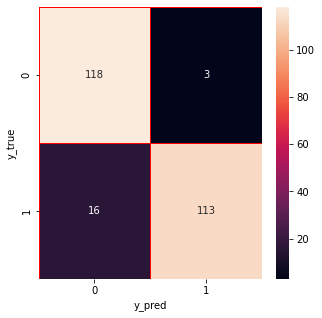

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [62]:
import pickle

pickle.dump(model_gb,open('liver.pkl','wb'))
liver = pickle.load(open('liver.pkl','rb'))